In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib.scale import LinearScale
import math
from math import sin, cos, radians
import time
from random import randint as rand
import numpy as np
from p5 import setup, draw, size, background, run

In [2]:
dt=0.01
num_frames=5

In [3]:
class point:
    def __init__(self,x,y):
        self.x=x 
        self.y=y 
    def __add__(self, p):
        return point(self.x+p.x,self.y+p.y)
    def __sub__(self, p):
        return point(self.x-p.x,self.y-p.y)
    def __mul__(self,s):
        return point(self.x*s,self.y*s)
    def print(self):
        print("(",self.x,",",self.y,")")

In [4]:
#utility functions
def GetOrthUnitVector(V):#V is a point
    if V.y==0:
        return point(0,1)
    v1=5
    v2=(-(V.x)/V.y)*v1
    magnitude=math.sqrt(v1**2+v2**2)
    v2=v2/magnitude
    v1=v1/magnitude
    return point(v1,v2)

def PrintPoints(points):
    for x in points:
        x.print()

def DrawRectangle(p):
    x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
    x.append(p[0].x)
    y.append(p[0].y)
    plt.plot(x,y)

In [5]:
class vehicle:
    def __init__(self, length, width, speed_limit, acc_limit, centroid, angle, v, a):
        #parameters
        self.length = length
        self.width = width
        self.speed_limit = speed_limit 
        self.acc_limit = acc_limit 
        #state variables
        self.centroid = centroid 
        self.angle = angle 
        self.v = v
        self.a = a
    def StateToCorners(self):
        dir_vect=point(math.cos(self.angle),math.sin(self.angle))
        dir_vect=dir_vect*(self.length/2)
        orth_vect=GetOrthUnitVector(dir_vect)
        orth_vect=point(orth_vect.x*(self.width)/2,orth_vect.y*(self.width)/2)
        points=[]
        points.append(self.centroid+dir_vect+orth_vect)
        points.append(self.centroid+dir_vect-orth_vect)
        points.append(self.centroid-dir_vect-orth_vect)
        points.append(self.centroid-dir_vect+orth_vect)
        return points
    def DrawVehicle(self):
        p=self.StateToCorners()
        DrawRectangle(p)
        
        plt.plot(self.centroid.x,self.centroid.y,marker="o",markersize=5,markerfacecolor="green")
        ax = plt.gca()
        ax.set_aspect('equal', adjustable='box')
        plt.show()
    def ShortestDistance(self,V):
        veh1=self.StateToCorners()
        veh2=V.StateToCorners()
        min=99999999
        for i in veh1:
            for j in veh2:
                dist = math.dist([i.x, i.y], [j.x, j.y])
                if dist<min:
                    min=dist
        return min
    def controller(self):
        return self.a #will return acceleration at t+1 using acceleration at t
    def updateStateVars(self):
            self.v=self.v+(self.controller()*dt)
            self.centroid=self.centroid+self.v*dt
            self.angle=math.atan2(self.v.y,self.v.x)
    def getxyLists(self):
      p=self.StateToCorners()
      x, y = [p[i].x for i in range(4)], [p[i].y for i in range(4)]
      x.append(p[0].x)
      y.append(p[0].y)
      return x,y
    

In [ ]:
fig = plt.figure()
l=6
w=2
vehicle_angle=radians(60)
vel_angle=radians(90)#angle the velocity vector makes with x axis
vel_dir=point(cos(vel_angle),sin(vel_angle))#unit vector in the direction of velocity
centroid=point(-7,-6)
curr_speed=10#magnitude of velocity
curr_vel=vel_dir*curr_speed

In [30]:
def simulate(Vs, fn):
    fig = plt.figure()

    axis = plt.axes(xlim =(-20, 20),
            ylim =(-20, 20))

    x_list = []
    y_list = []
    
    for V in Vs:
        # get the x and y coordinates for the current vehicle
        x, y = V.getxyLists()
        # append the x and y coordinates to the lists
        x_list.append(x)
        y_list.append(y)

    
    lines=[]
    for j in range(len(Vs)):
      line, =axis.plot(x_list[j], y_list[j])
      lines.append(line) #storing all 2d lines (rectangles) in a list

    
    def init():
        lines[0].set_data(x_list[0], y_list[0])
        return lines

    def animate(i):
        # loop over the list of vehicles
        for count, V in enumerate(Vs):
            # update the state variables for each vehicle
            V.updateStateVars()
            # get the updated x and y coordinates for the current vehicle
            x, y = V.getxyLists()
            # update the x and y lists with the updated coordinates
            x_list[count] = x
            y_list[count] = y
        # update all lines with the updated x and y lists
        for j in range(len(Vs)):
          lines[j].set_data(x_list[j], y_list[j])
        return lines

    anim = FuncAnimation(fig, animate, init_func = init,
            frames = 500, interval = 200, blit = True)

    #anim.save(fn, writer = 'ffmpeg', fps = 30)


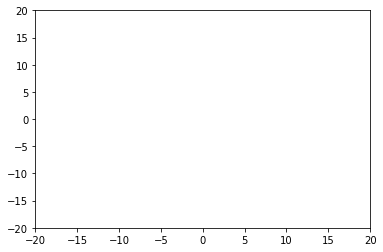

In [35]:
Vs=[]
Vs.append(vehicle(l,w,0,0,point(-10,-15),vehicle_angle,curr_vel,point(0,0)))

vel_angle=radians(90)#angle the velocity vector makes with x axis
vel_dir=point(cos(vel_angle),sin(vel_angle))#unit vector in the direction of velocity
curr_speed=7#magnitude of velocity
curr_vel=vel_dir*curr_speed

Vs.append(vehicle(l,w,0,0,point(5,-5),vehicle_angle,curr_vel,point(0,0)))
simulate(Vs, "simulation.mp4")